In [1]:
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import time 

%matplotlib inline

## Kindly note that all utility functions are found and documented in util.py

## P1: Add additive noise to the image
   >**For example: Uniform, Gaussian and salt & pepper noise.**

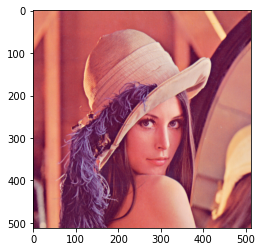

In [2]:
original_img = cv2.imread("images/lena.png")
original_img_rgb = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
original_gray_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

plt.imshow(original_img_rgb)

### P1.1: Adding Uniform Noise

In [3]:
from util import compare_after_noise, add_uniform_noise,\
                add_saltNpepper_noise,add_gaussian_noise

Uniform noise value is: 30


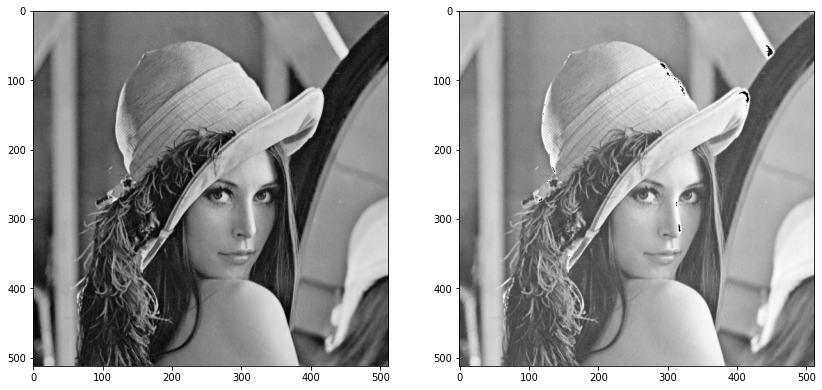

In [13]:
compare_after_noise(original_gray_img, add_uniform_noise)

### P1.2: Adding Salt&Pepper Noise

 Adding noise with salt weight: 0.1 and pepper weight:0.1


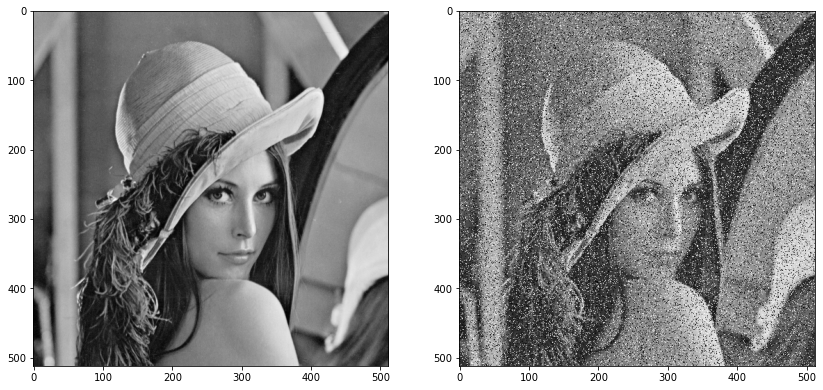

In [5]:
compare_after_noise(original_gray_img, add_saltNpepper_noise)

### P1.3: Adding Gaussian Noise

Adding gaussian noise with mean=0 and std=10


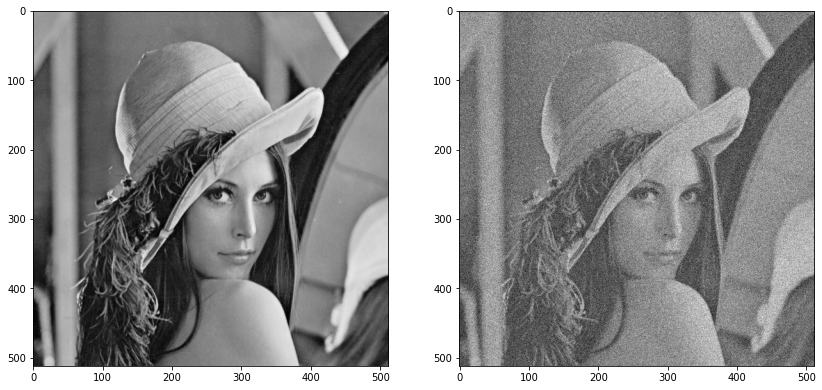

In [4]:
compare_after_noise(original_gray_img, add_gaussian_noise)

## P2: Filter the noisy image using the following low pass filters.

> **Average, Gaussian and median filters.**

In [7]:
import cv2 as cv
from util import convolution

In [8]:
median = cv.imread('./images/median.jpg', cv.IMREAD_GRAYSCALE)      # salt and peper
median_resized = cv.resize(median, (320, 320))

average = cv.imread('./images/average.jpg',cv.IMREAD_GRAYSCALE)	   # jagged edges
average_resized = cv.resize(average, (320, 320))

gaussian = cv.imread('./images/gaussian.jpg',cv.IMREAD_GRAYSCALE)  # jagged edges
gaussian_resized = cv.resize(gaussian, (320, 320))


filtered_median = convolution(median_resized,"median",(3,3))
filtered_average = convolution(average_resized,"average",(3,3))
filtered_gaussian = convolution(gaussian_resized,"gaussian",(3,3))



318 318
318 318
318 318


Text(0.5, 1.0, 'filtered salt and peper')

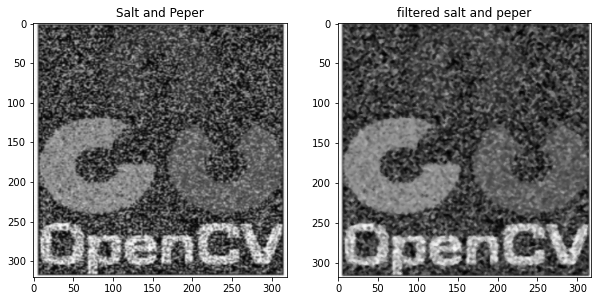

In [9]:

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)  
plt.imshow(median_resized, cmap='gray')
plt.title("Salt and Peper")

fig.add_subplot(rows, columns, 2)
plt.imshow(filtered_median, cmap='gray')
plt.title("filtered salt and peper")


Text(0.5, 1.0, 'smoothed with average')

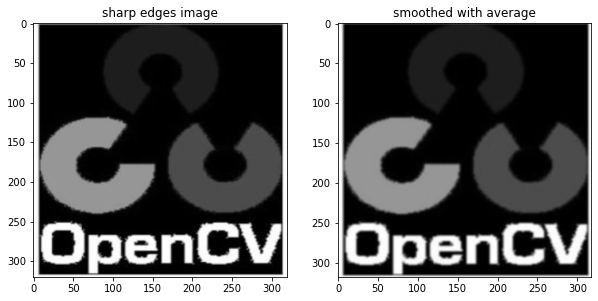

In [10]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)  
plt.imshow(average_resized, cmap='gray')
plt.title("sharp edges image")

fig.add_subplot(rows, columns, 2)
plt.imshow(filtered_average, cmap='gray')
plt.title("smoothed with average")

Text(0.5, 1.0, 'smoothed with gaussian')

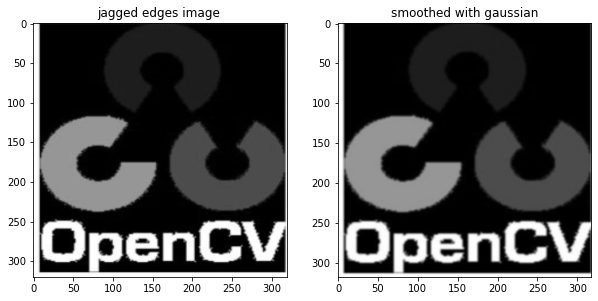

In [11]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)  
plt.imshow(gaussian_resized, cmap='gray')
plt.title("jagged edges image ")

fig.add_subplot(rows, columns, 2)
plt.imshow(filtered_gaussian, cmap='gray')
plt.title("smoothed with gaussian")

## P3: Detect edges in the image using the following masks
> **Sobel , Roberts , Prewitt and Canny edge detectors**

### P3.1: Sobel , Roberts , and Prewitt edge detectors

In [12]:
from util import gradient_detector, non_max_suppression,threshold,\
                canny_detector

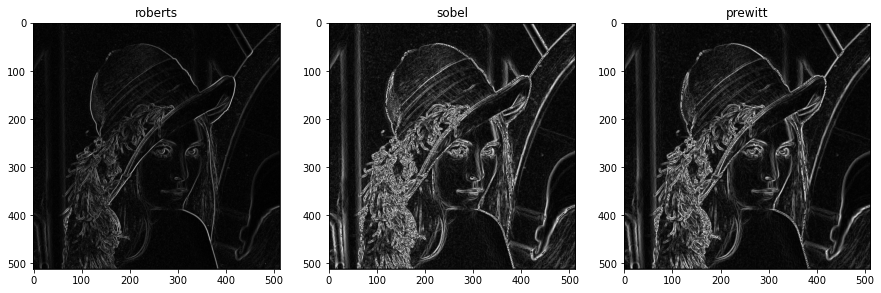

In [13]:
detectors = {'sobel', 'prewitt', 'roberts'}
fig, axs = plt.subplots(1, 3, figsize=(15, 5));
for i, detector in enumerate(detectors):
    mag, angle = gradient_detector(original_gray_img, detector_type=detector)
    axs[i].imshow(mag, cmap="gray");
    axs[i].set_title(detector)

### Illustrations for how non-maximum suppression is applied between the target pixel and its adjacent pixels in all directions 
<img src="images/angles1.png" height="20%" width="50%"  align="left">
<img src="images/angles.png"  height="20%" width="50%" align='right'>

### P3.2: Canny edge detectors

510 510


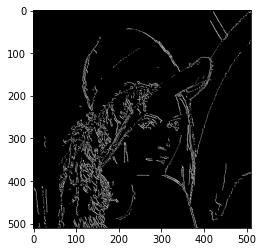

In [14]:
canny_img = canny_detector(original_gray_img)
plt.imshow(canny_img, cmap="gray");

## P4: Draw histogram and distribution curve

In [10]:
from util import image_details, value_counts, draw_histogram_sns,\
                 draw_histogram_scratch

### P4.1:Using Seaborn 

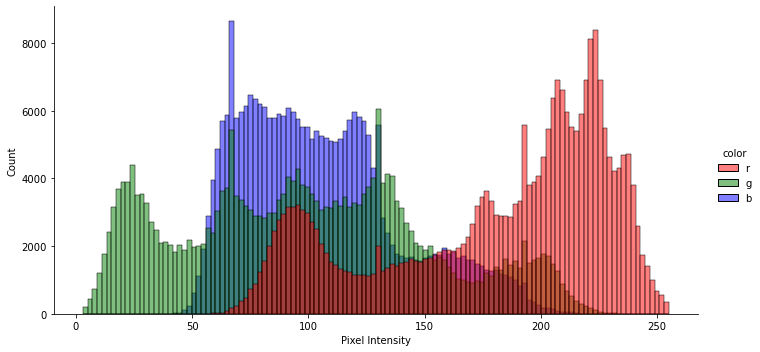

In [16]:
draw_histogram_sns(original_img_rgb, plot_type='hist')

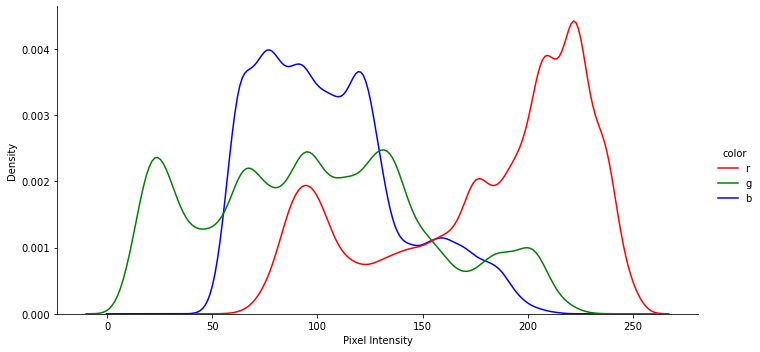

In [17]:
draw_histogram_sns(original_img_rgb, plot_type='kde')

### P4.1:Using implementation from scratch 

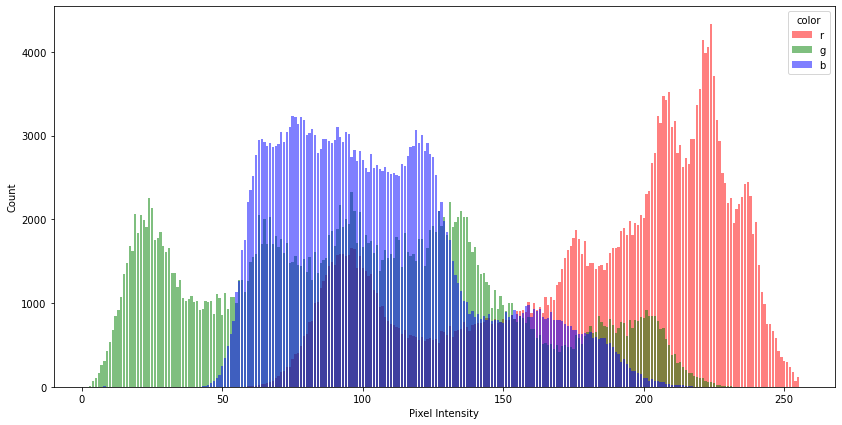

In [18]:
draw_histogram_scratch(original_img_rgb)

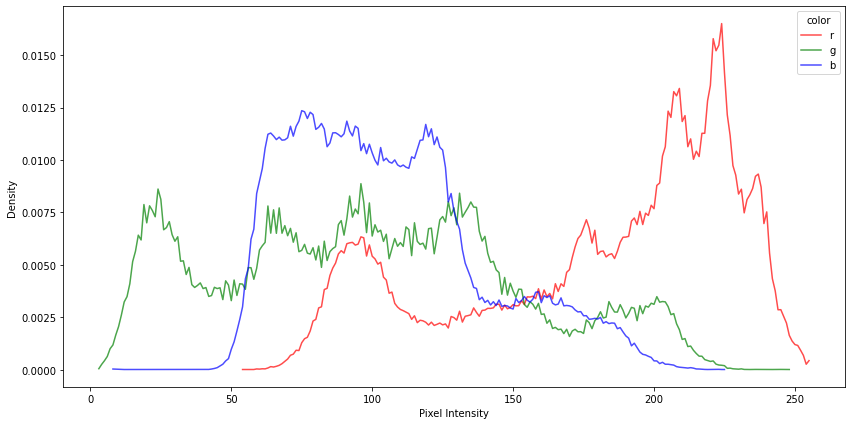

In [19]:
draw_histogram_scratch(original_img_rgb, plot_type='kde')

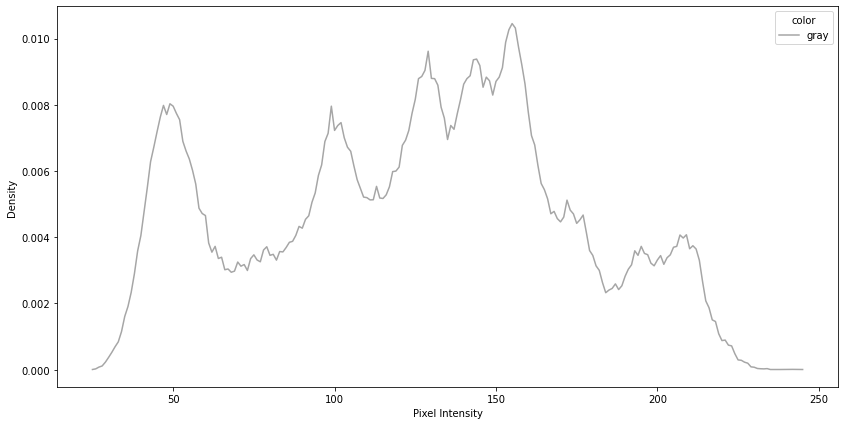

In [20]:
draw_histogram_scratch(original_gray_img, plot_type='kde')

## P5: Equalize the image

In [6]:
from util import get_histogram, cumSumNorm, histEqualize

Text(0.5, 1.0, 'Gray Scale Image')

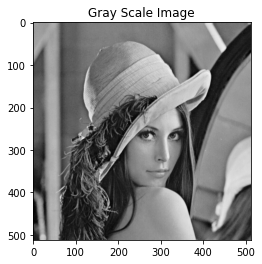

In [13]:
img = cv.imread("./images/lena.png", cv.IMREAD_GRAYSCALE)
plt.imshow(img, cmap="gray")
plt.axis('Image')
plt.title("Gray Scale Image")


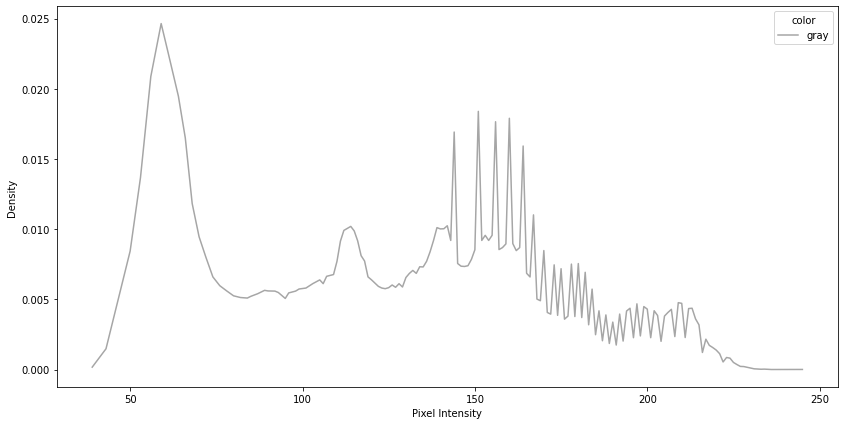

In [15]:
hist = get_histogram(img, 256)
## Replacing our get_histogram with `draw_histogram_scratch` function 
# for better visualization ##
draw_histogram_scratch(img, "kde")

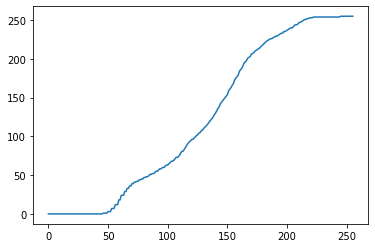

In [16]:
# Normalized Cummulative Sum

cs_norm = cumSumNorm(hist)
plt.plot(cs_norm)

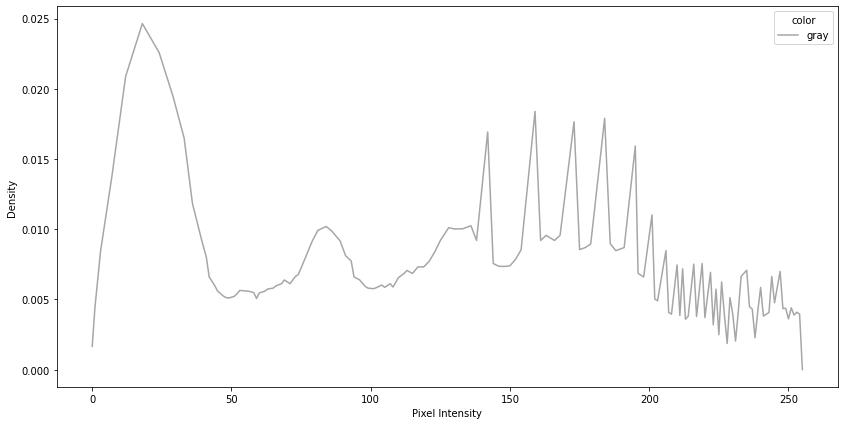

In [17]:
equalized_image = histEqualize(img)
# we see a much more evenly distributed histogram

# put array back into original shape since we flattened it
equalized_image = np.reshape(equalized_image, img.shape)

## Replacing matplot hist with our `draw_histogram_scratch` function ##
draw_histogram_scratch(equalized_image, "kde")

Text(0.5, 1.0, 'Equalized Lena (contrast enhancement)')

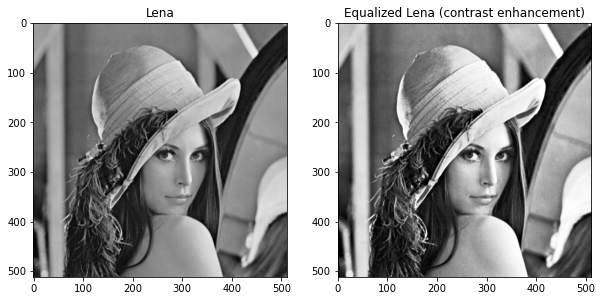

In [30]:

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)  
plt.imshow(img, cmap='gray')
plt.title("Lena")

fig.add_subplot(rows, columns, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title("Equalized Lena (contrast enhancement)")

In [18]:
lung = cv.imread("./images/lung.jpg", cv.IMREAD_GRAYSCALE)
equalized_lung = histEqualize(lung)
# put array back into original shape since we flattened it
equalized_lung = np.reshape(equalized_lung, lung.shape)

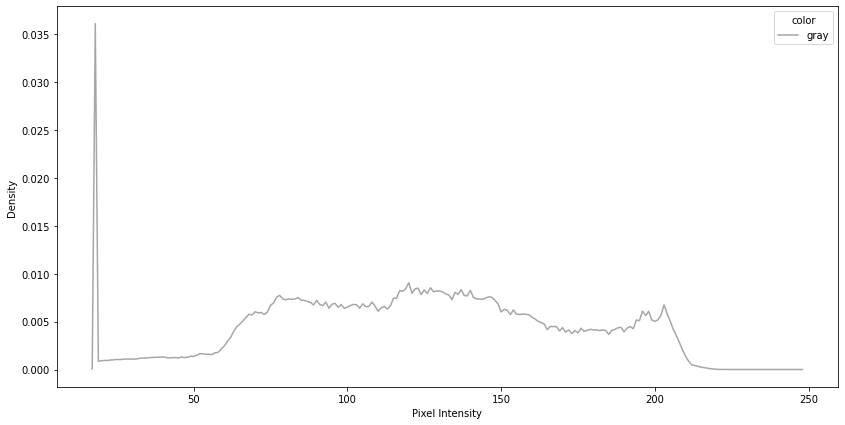

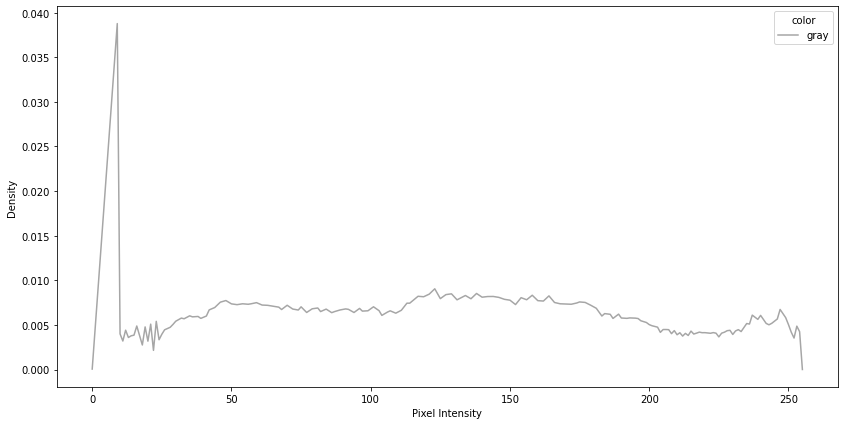

In [19]:
draw_histogram_scratch(lung, "kde")
draw_histogram_scratch(equalized_lung, "kde")

Text(0.5, 1.0, 'Equalized Lung (contrast enhancement)')

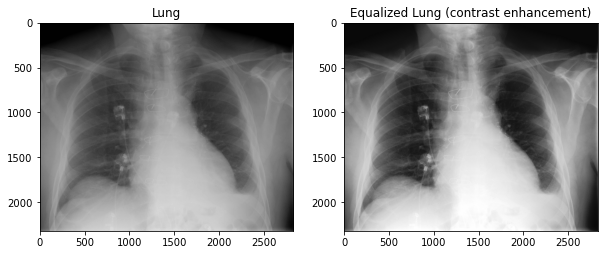

In [33]:

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)  
plt.imshow(lung, cmap='gray')
plt.title("Lung")

fig.add_subplot(rows, columns, 2)
plt.imshow(equalized_lung, cmap='gray')
plt.title("Equalized Lung (contrast enhancement)")

## P6: Normalize the image

In [7]:
from util import min2d, max2d, normalize
import cv2 as cv

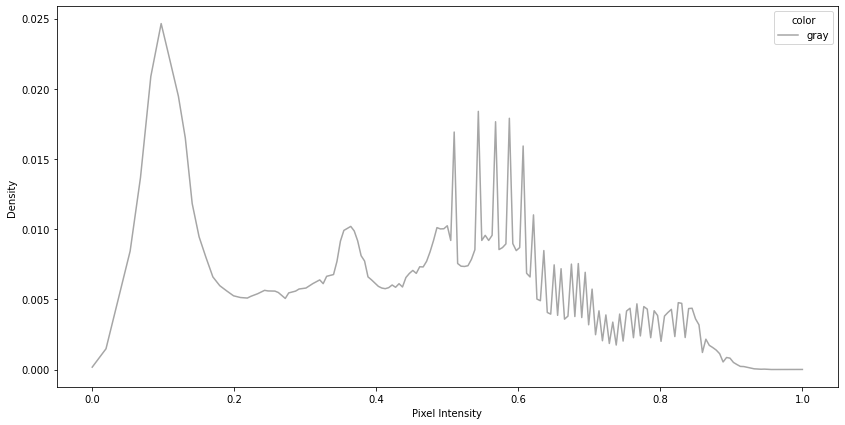

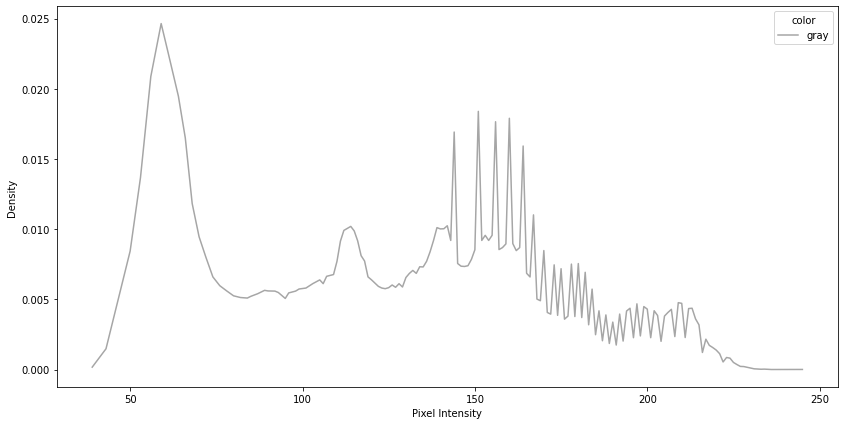

In [10]:
lena = cv.imread("./images/lena.png", cv.IMREAD_GRAYSCALE)

lena_norm = normalize(lena)

## Replacing matplot hist with our `draw_histogram_scratch` function ##

draw_histogram_scratch(lena_norm, "kde")
draw_histogram_scratch(lena, "kde")



Original Image MIN: 39 MAX:245 
Original Image MIN: 0.0 MAX:1.0 


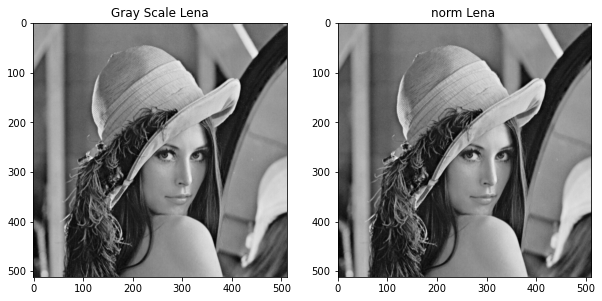

In [ ]:
lena = cv.imread("./images/lena.png", cv.IMREAD_GRAYSCALE)

lena_norm = normalize(lena)

fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)  
plt.imshow(lena, cmap="gray")
plt.axis('Image')
plt.title("Gray Scale Lena")

fig.add_subplot(rows, columns, 2)
plt.imshow(lena_norm, cmap='gray') 
plt.axis('Image')
plt.title("norm Lena ")

print(f'Original Image MIN: {min2d(lena)} MAX:{max2d(lena)} ')
print(f'Original Image MIN: {min2d(lena_norm)} MAX:{max2d(lena_norm)} ')


## P7. Local and Global Thresholding

### P7.1 Global

In [1]:
from PIL import Image
import numpy as np
from util import global_thresholding, adaptative_thresholding, comparison_plot, compare_three_imgs

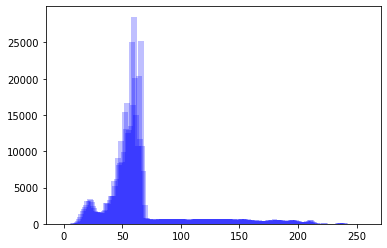

e:\2022-2ndtern\cv\tasks\task1-python\assignment-1-cv-2022-sbe-404-team_10\util.py:774: RuntimeWarning: invalid value encountered in double_scalars
  return m/float(w)


optimal threshold 106


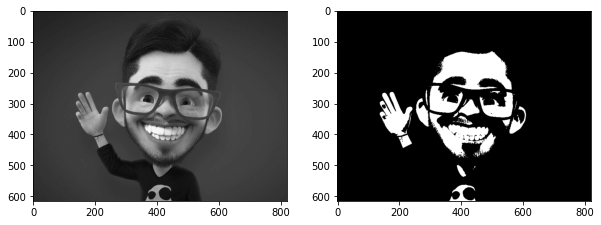

In [2]:
image = Image.open('./images/avatar.png').convert("L")

binary_image = global_thresholding(image)

comparison_plot(image, binary_image)

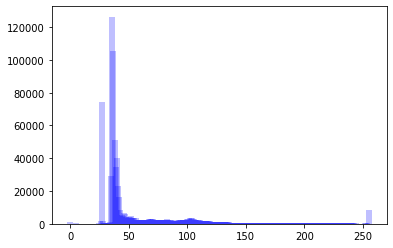

optimal threshold 93


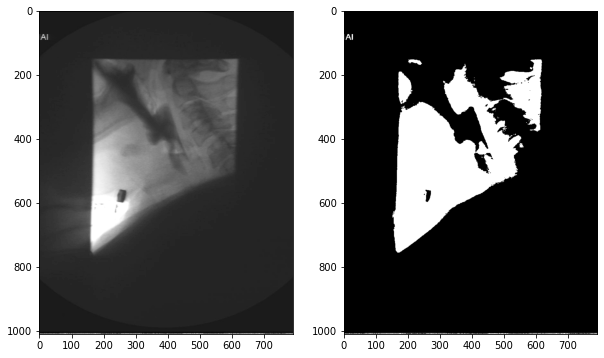

In [26]:
image = Image.open('./images/xray/ns050a_00389.png').convert("L")

binary_image = global_thresholding(image)

comparison_plot(image, binary_image)

### Global thresholding performs badly With Shadows

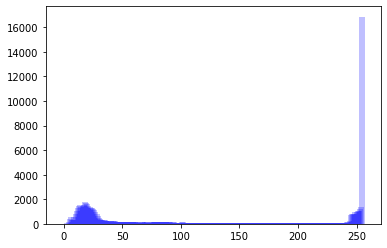

optimal threshold 139


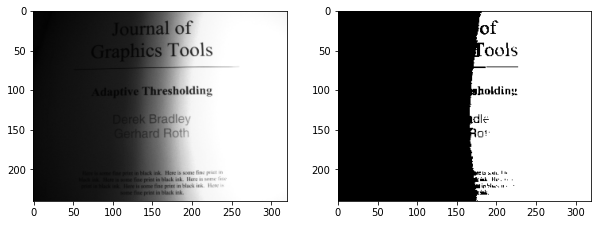

In [4]:
image = Image.open('./images/text.png').convert("L")

binary_image = global_thresholding(image)

comparison_plot(image, binary_image)


### P7.2 Local Thresholding

We used Bradley implementation for local adaptive image thresholding based on integral image from 
`https://people.scs.carleton.ca/~roth/iit-publications-iti/docs/gerh-50002.pdf`

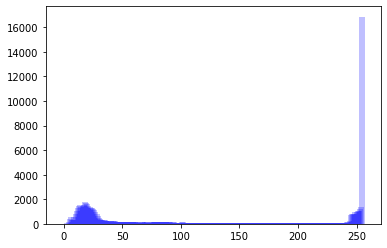

optimal threshold 139


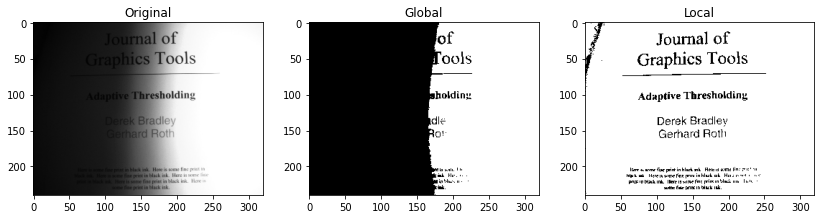

In [5]:
image = Image.open('./images/text.png').convert("L")
img = np.asarray(image)

global_th = global_thresholding(image)
local_th = adaptative_thresholding(img, 20)

compare_three_imgs(image, global_th, local_th )


In [1]:
image = Image.open('./images/xray/ns050a_00392.png').convert("L")
img = np.asarray(image)
global_th = global_thresholding(image)
local_th = adaptative_thresholding(img, 4,16)
compare_three_imgs(image, global_th, local_th )

NameError: name 'Image' is not defined

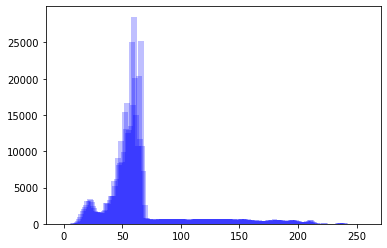

e:\2022-2ndtern\cv\tasks\task1-python\assignment-1-cv-2022-sbe-404-team_10\util.py:774: RuntimeWarning: invalid value encountered in double_scalars
  return m/float(w)


optimal threshold 106


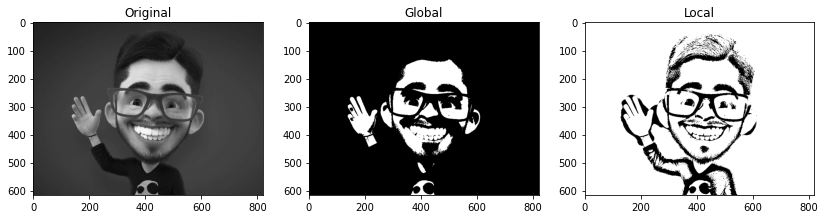

In [52]:
image = Image.open('./images/avatar.png').convert("L")
img = np.asarray(image)

global_th = global_thresholding(image)
local_th = adaptative_thresholding(img, 20)

compare_three_imgs(image, global_th, local_th )

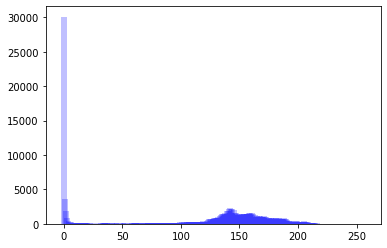

optimal threshold 79


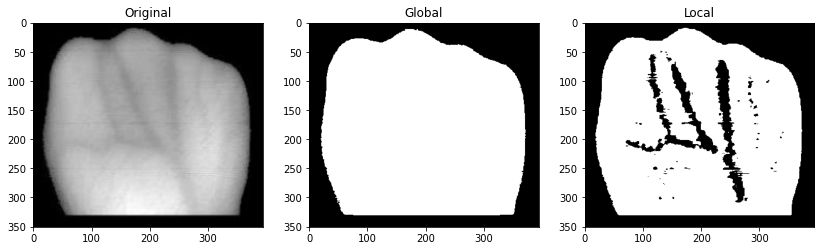

In [7]:
image = Image.open('./images/veins.png').convert("L")
img = np.asarray(image)

global_th = global_thresholding(image)
local_th = adaptative_thresholding(img, 3, 8)

compare_three_imgs(image, global_th, local_th )

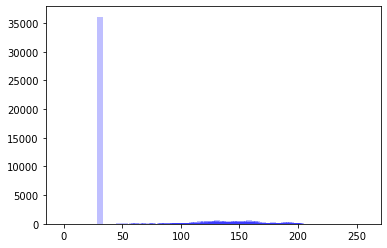

optimal threshold 90


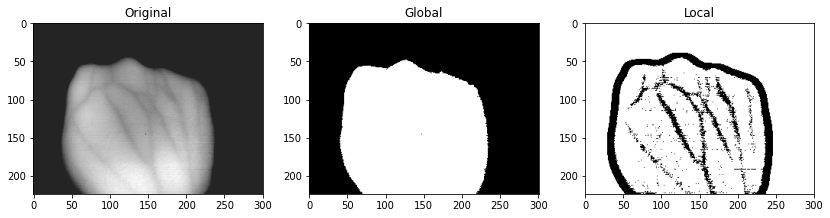

In [8]:
image = Image.open('./images/veins2.png').convert("L")
img = np.asarray(image)

global_th = global_thresholding(image)
local_th = adaptative_thresholding(img, 3, 16)

compare_three_imgs(image, global_th, local_th )

### P8. RGB2Gray and color channels histogram

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2 as cv
from util import rgb2gray, comparison_plot, draw_histogram_scratch


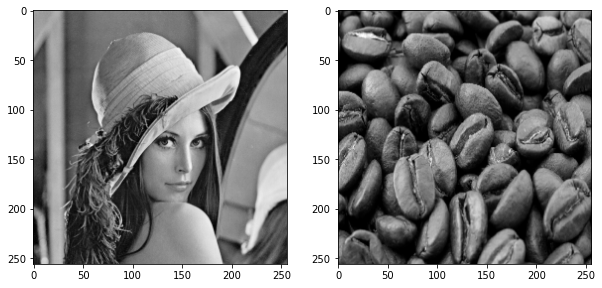

In [11]:
# read image
lena = mpimg.imread('./images/lena.png') 
coffee = mpimg.imread('./images/coffee.png')     

# rgb to grey
lena_gray = rgb2gray(lena)
coffee_gray = rgb2gray(coffee)

# resize
resized_lena = cv.resize(lena_gray, (256,256))
resized_coffee = cv.resize(coffee_gray, (256,256))

comparison_plot(resized_lena, resized_coffee)

In [12]:
original_img = cv.imread("images/lena.png")
original_img_rgb = cv.cvtColor(original_img, cv.COLOR_BGR2RGB)

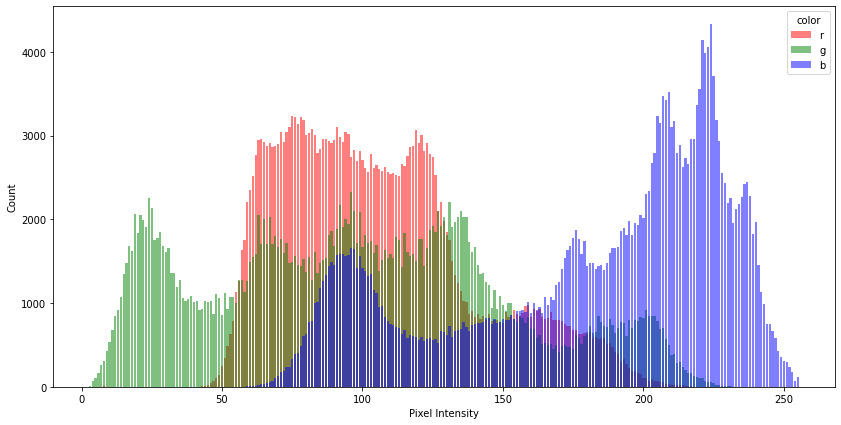

In [13]:
draw_histogram_scratch(original_img)

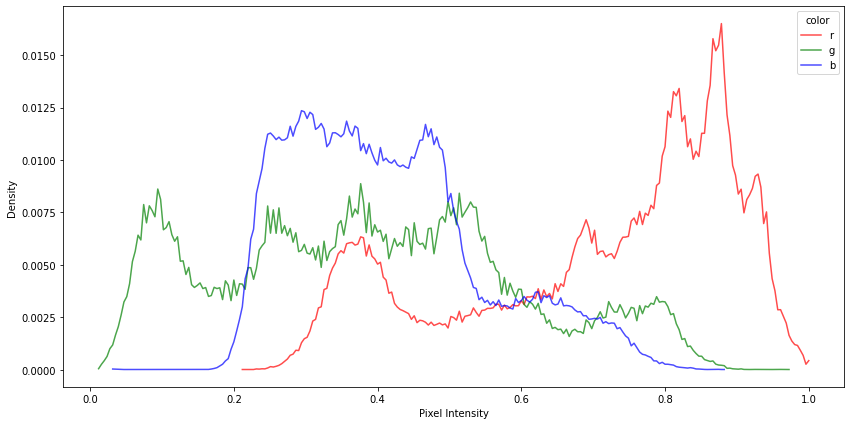

In [14]:
draw_histogram_scratch(lena, plot_type='kde')

In [15]:
from util import get_histogram, cumSumNorm, histEqualize, compare_three_imgs

In [16]:
image = cv.imread('./images/lena.png')
(B, G, R) = cv.split(image)


Text(0.5, 1.0, 'Red Channel')

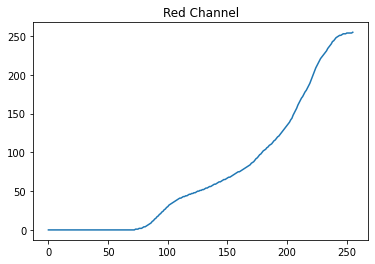

In [17]:
r_hist = get_histogram(R, 256)
r_cdf = cumSumNorm(r_hist)
plt.plot(r_cdf)
plt.title("Red Channel")

Text(0.5, 1.0, 'Green Channel')

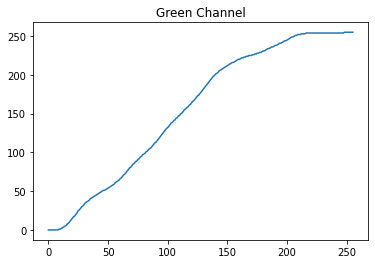

In [18]:
g_hist = get_histogram(G, 256)
g_cdf = cumSumNorm(g_hist)
plt.plot(g_cdf)
plt.title("Green Channel")

Text(0.5, 1.0, 'Blue Channel')

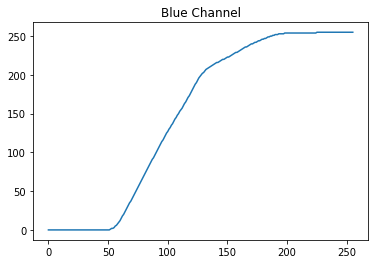

In [19]:
b_hist = get_histogram(B, 256)
b_cdf = cumSumNorm(b_hist)
plt.plot(b_cdf)
plt.title("Blue Channel")

## P9. Frequency Domain Filters (LPF - HPF)

In [20]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from util import fft2, ifft2, fftshift, make_gaussian, freq_filters, comparison_plot

<Figure size 1080x1440 with 0 Axes>

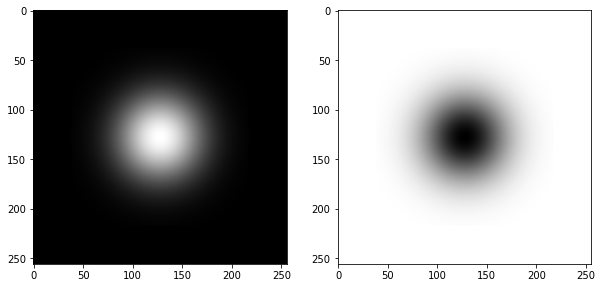

In [21]:
lena = mpimg.imread('./images/lena.png') 
cutoff_lpf = 60  # >> 6*50 -1 = 299  >> resized to target img
lpf = make_gaussian(cutoff_lpf)
hpf = lpf.max() - lpf

resized_lpf, resized_hpf= freq_filters(lena, lpf, hpf)
comparison_plot(resized_lpf, resized_hpf)


## P10. Hybrid Images

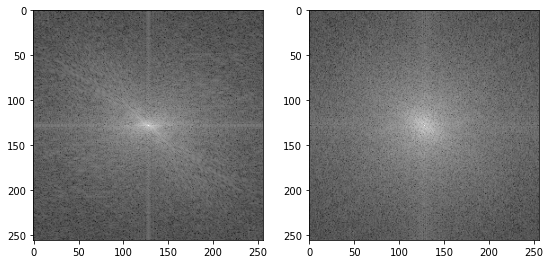

In [22]:
# Using fft2 , ifft, fftshift from scratch
 
lena_fft ,m1,n1 = fft2(resized_lena) 
coffee_fft ,m2,n2 = fft2(resized_coffee)

lena_fftshift = fftshift(lena_fft)
coffee_fftshift = fftshift(coffee_fft)

plt.figure(figsize=(14, 18))
plt.subplot(131)
plt.imshow(np.log(np.abs(lena_fftshift)), cmap='gray')
plt.subplot(132)
plt.imshow(np.log(np.abs(coffee_fftshift)), cmap='gray')
plt.show()

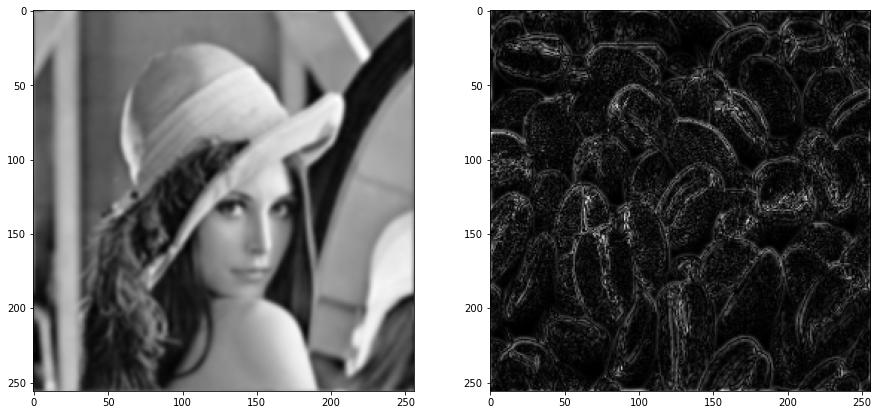

In [23]:
lena_lpf = ifft2(np.multiply(lena_fftshift, resized_lpf),m1, n1)
coffee_hpf = ifft2(np.multiply(coffee_fftshift, resized_hpf),m2, n2)

plt.figure(figsize=(15, 20))
plt.subplot(121)
plt.imshow(np.abs(lena_lpf), cmap='gray')
plt.subplot(122)
plt.imshow(np.abs(coffee_hpf), cmap='gray')

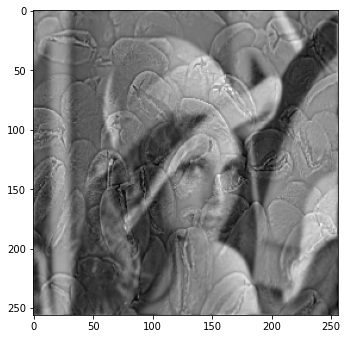

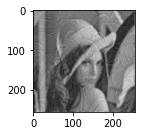

In [24]:
combined = ifft2( np.multiply(lena_fftshift, resized_lpf) + np.multiply(coffee_fftshift, resized_hpf), m1, n1 )
plt.figure(figsize=(12, 18))
plt.subplot(121)
plt.imshow(np.abs(combined), cmap='gray')
plt.figure(figsize=(4, 6))
plt.subplot(122)
plt.imshow(np.abs(combined), cmap='gray')

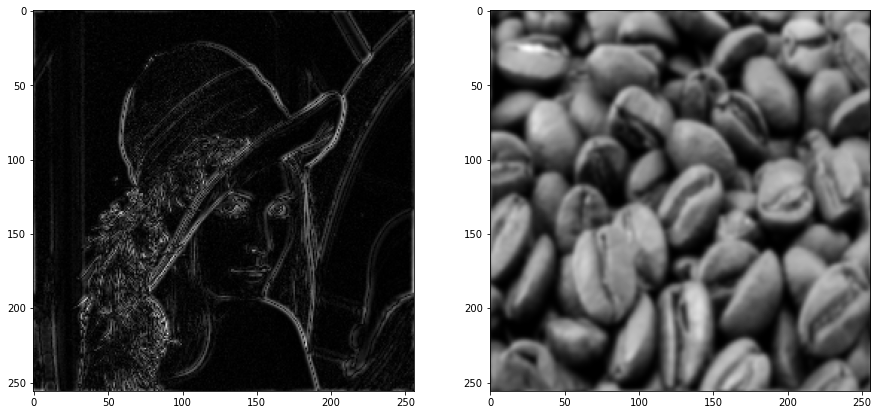

In [25]:
coffee_lpf = ifft2(np.multiply(coffee_fftshift, resized_lpf),m1, n1)
lena_hpf   = ifft2(np.multiply(lena_fftshift, resized_hpf),m2, n2)

plt.figure(figsize=(15, 20))
plt.subplot(121)
plt.imshow(np.abs(lena_hpf), cmap='gray')
plt.subplot(122)
plt.imshow(np.abs(coffee_lpf), cmap='gray')

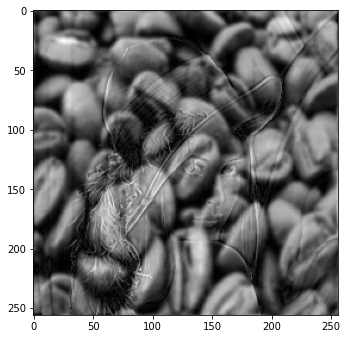

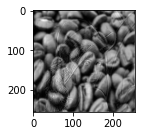

In [26]:
combined = ifft2( np.multiply(lena_fftshift, resized_hpf) + np.multiply(coffee_fftshift, resized_lpf), m1, n1 )
plt.figure(figsize=(12, 18))
plt.subplot(121)
plt.imshow(np.abs(combined), cmap='gray')
plt.figure(figsize=(4, 6))
plt.subplot(122)
plt.imshow(np.abs(combined), cmap='gray')